In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 현재 폴더 위치 = ./
fontpath = './NanumBarunpenB.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

import seaborn as sns

from os import listdir
from os.path import isfile, join
import glob
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

from plotnine import *

In [224]:
performance = pd.read_excel('./2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx')
ratings = pd.read_excel('./2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx')

In [ ]:
performance.columns=['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액']
performance = performance.drop([0])

# 이 부분이 performance 기본? 전처리를 수정한것
노출(분)을 동일 방송시간으로, 무형 상품군의 취급액 Nan 부분은 0으로

In [229]:
#-*-coding:utf-8-*-
performance_minute=pd.DataFrame()
performance_minute['노출(분)'] = performance['노출(분)']
performance_minute = performance_minute.fillna(method = 'pad')

performance = performance.drop(['노출(분)'], axis=1)

performance = performance.fillna(0)
performance['노출(분)'] = performance_minute

performance = performance.astype({'노출(분)' : 'int',
                                  '마더코드' : 'int',
                                  '상품코드' : 'int',
                                  '판매단가' : 'int',
                                  '취급액' : 'int'})

performance

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출(분)
1,2019-01-01 06:00:00,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20
2,2019-01-01 06:00:00,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20
3,2019-01-01 06:20:00,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,20
4,2019-01-01 06:20:00,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,20
5,2019-01-01 06:40:00,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,20
...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,20
38306,2020-01-01 00:40:00,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,20
38307,2020-01-01 01:00:00,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,20
38308,2020-01-01 01:20:00,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,0,20


In [159]:
# len(performance['상품명'].unique())

1770

In [230]:
using_performance = performance

In [231]:
using_performance.tail(10)

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출(분)
38300,2019-12-31 23:40:00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000,20
38301,2020-01-01 00:00:00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000,20
38302,2020-01-01 00:00:00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000,20
38303,2020-01-01 00:00:00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000,20
38304,2020-01-01 00:00:00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,46608000,20
38305,2020-01-01 00:20:00,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,20
38306,2020-01-01 00:40:00,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,20
38307,2020-01-01 01:00:00,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,20
38308,2020-01-01 01:20:00,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,0,20
38309,2020-01-01 01:40:00,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,0,17


In [185]:
items = performance['상품명']
encoder = LabelEncoder()
encoder.fit(items)

labels = performance['상품명'] = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [1592 1598 1592 ...  959  487  487]


In [186]:
items = performance['상품군']
encoder_ = LabelEncoder()
encoder_.fit(items)

labels_ = performance['상품군'] = encoder_.transform(items)
print('인코딩 변환값:',labels_)

인코딩 변환값: [7 7 7 ... 4 4 4]


In [174]:
labels

array([1592, 1598, 1592, ...,  959,  487,  487])

In [176]:
labels_

array([7, 7, 7, ..., 4, 4, 4])

In [188]:
realname = []
encodedname=[]
for i, item in enumerate(encoder.classes_) : 
    print(item, '->', i)
    realname.append(item)
    encodedname.append(i)

  뉴트리원 다이어트 구미 -> 0
 [가이거] 블랙 에디션 다이아몬드 워치(남성용) -> 1
 [가이거] 블랙 에디션 다이아몬드 워치(여성용) -> 2
 [맛있는 제주]손질 생선 3대세트+흑돼지구이(광어+갈치+고등어 -> 3
 국내제조 오슬로 IH 프라이팬 세트 -> 4
 메디아글램 카이만엠보 소가죽 체인숄더백 (+클러치백+폼폼이) -> 5
 메디아글램 카이만엠보 소가죽 토트백 (+클러치백+폼폼이) -> 6
 블랙모어스 알티지 오메가3 3병 (53주분) -> 7
 서울대 더 리얼 신바이오틱스 6박스 (6개월분) -> 8
 용인공원라이프 스마트라이프48 -> 9
 한국인 모유유래 다이어트 유산균 BNR17 비에날씬 12주(3박스) -> 10
" 100%리얼 착즙 석류 ", 총 4박스 -> 11
(1등급)221L_딤채김치냉장고 -> 12
(1등급)221L_딤채김치냉장고(LDL22DHWJJ) -> 13
(1등급)467L_딤채김치냉장고 -> 14
(ARS10%)크로커다일 풀커버 레이스 브라팬티 4세트 -> 15
(a4)팽현숙의 순대 곱창 전골&볶음 -> 16
(대형)한솔 뉴청맥 온열 카페트매트 -> 17
(더블+더블)일월 순면 온열매트 -> 18
(더블+싱글)일월 순면 온열매트 -> 19
(더블사이즈)일월 순면 온열매트 -> 20
(도냄)무이자 쿠쿠전기밥솥 10인용 -> 21
(도냄)무이자 쿠쿠전기밥솥 6인용 -> 22
(도냄)일시불  쿠쿠전기밥솥 6인용 -> 23
(도냄)일시불 쿠쿠전기밥솥 10인용 -> 24
(렌탈) 헬스리아 반신욕기 -> 25
(무) 삼익가구 LED 제니비 서랍형 침대 K -> 26
(무) 삼익가구 LED 제니비 서랍형 침대 Q -> 27
(무) 삼익가구 LED 제니비 서랍형 침대 SS -> 28
(무) 한샘 하이바스 내추럴 기본형 -> 29
(무)100%리얼착즙석류 4박스 -> 30
(무)3인용 한샘 뉴퍼스티지R 리클라이너 -> 31
(무)4인용 한샘 뉴퍼스티지R 리클라이너 -> 32
(무)[보루네오] 피올레 천연소가죽 소파 3인용 -> 33

In [197]:
name_encode = pd.DataFrame()
name_encode['name']=realname
name_encode['encode_name']=encodedname

name_encode

,name,encode_name
0,뉴트리원 다이어트 구미,0
1,[가이거] 블랙 에디션 다이아몬드 워치(남성용),1
2,[가이거] 블랙 에디션 다이아몬드 워치(여성용),2
3,[맛있는 제주]손질 생선 3대세트+흑돼지구이(광어+갈치+고등어,3
4,국내제조 오슬로 IH 프라이팬 세트,4
...,...,...
1765,효재 화원 자수 광목워싱 침구세트 퀸,1765
1766,효재 화원 자수 광목워싱 침구세트 킹,1766
1767,휴테크 안마의자,1767
1768,히트융 극세사 퍼융기모 남성 동내의 패키지,1768


In [10]:
dayofweek = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun']
performance['요일'] = [dayofweek[i] for i in performance['방송일시'].dt.dayofweek]

In [11]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [12]:
performance_=pd.DataFrame(performance)
performance_

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출(분),요일
1,2019-01-01 06:00:00,100346,201072,1592,7,39900,2099000,20,tue
2,2019-01-01 06:00:00,100346,201079,1598,7,39900,4371000,20,tue
3,2019-01-01 06:20:00,100346,201072,1592,7,39900,3262000,20,tue
4,2019-01-01 06:20:00,100346,201079,1598,7,39900,6955000,20,tue
5,2019-01-01 06:40:00,100346,201072,1592,7,39900,6672000,20,tue
...,...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,100073,200196,959,4,0,0,20,wed
38306,2020-01-01 00:40:00,100073,200196,959,4,0,0,20,wed
38307,2020-01-01 01:00:00,100073,200196,959,4,0,0,20,wed
38308,2020-01-01 01:20:00,100490,201478,487,4,0,0,20,wed


In [13]:
performance_['방송일시']=pd.to_datetime(performance_['방송일시'], format='%Y-%m-%d %H:%M:%S')
performance_['month']=performance_['방송일시'].dt.month 
performance_.tail(30)

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출(분),요일,month
38280,2019-12-31 21:00:00,100501,201516,708,5,239000,19504000,20,tue,12
38281,2019-12-31 21:00:00,100501,201518,1305,5,219000,61370000,20,tue,12
38282,2019-12-31 21:00:00,100501,201515,669,5,458000,6781000,20,tue,12
38283,2019-12-31 21:00:00,100501,201517,1266,5,418000,15181000,20,tue,12
38284,2019-12-31 21:20:00,100155,200556,1297,1,1359000,29141000,20,tue,12
38285,2019-12-31 21:20:00,100155,200489,700,1,1499000,20154000,20,tue,12
38286,2019-12-31 21:40:00,100155,200556,1297,1,1359000,43700000,20,tue,12
38287,2019-12-31 21:40:00,100155,200489,700,1,1499000,24110000,20,tue,12
38288,2019-12-31 22:00:00,100155,200556,1297,1,1359000,72733000,20,tue,12
38289,2019-12-31 22:00:00,100155,200489,700,1,1499000,32184000,20,tue,12


In [14]:
import statsmodels.api as sm
result = sm.OLS.from_formula("취급액 ~ C(month)", data=performance_).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    취급액   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     45.23
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           5.01e-99
Time:                        12:18:31   Log-Likelihood:            -6.9856e+05
No. Observations:               38309   AIC:                         1.397e+06
Df Residuals:                   38297   BIC:                         1.397e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.387e+07   3.74e+05     63.

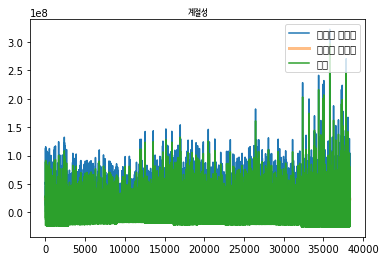

In [15]:
plt.plot(performance_['취급액'], label = '취급액 시계열')
plt.plot(result.fittedvalues, lw = 3, alpha = 0.5, label = '추정한 시계열')
plt.plot(result.resid, label = '잔차')
plt.title("계절성", fontproperties = font)
plt.legend(loc=1)
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()

plt.rc('font', family=font_name)

plt.show()

#알 수가 없어........
#필요도 없...는 거 같은데.............

In [16]:
performance.corr()

,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출(분),month
마더코드,1.000000,0.975614,0.039604,0.239805,-0.215932,-0.034653,0.091340,-0.072732
상품코드,0.975614,1.000000,0.046630,0.236466,-0.230717,-0.026861,0.081440,-0.083497
상품명,0.039604,0.046630,1.000000,0.125782,-0.068612,0.096727,0.003089,-0.083906
상품군,0.239805,0.236466,0.125782,1.000000,-0.494461,0.020047,0.083893,0.041605
판매단가,-0.215932,-0.230717,-0.068612,-0.494461,1.000000,-0.227178,0.120743,-0.063367
취급액,-0.034653,-0.026861,0.096727,0.020047,-0.227178,1.000000,0.006516,0.055969
노출(분),0.091340,0.081440,0.003089,0.083893,0.120743,0.006516,1.000000,-0.019774
month,-0.072732,-0.083497,-0.083906,0.041605,-0.063367,0.055969,-0.019774,1.000000


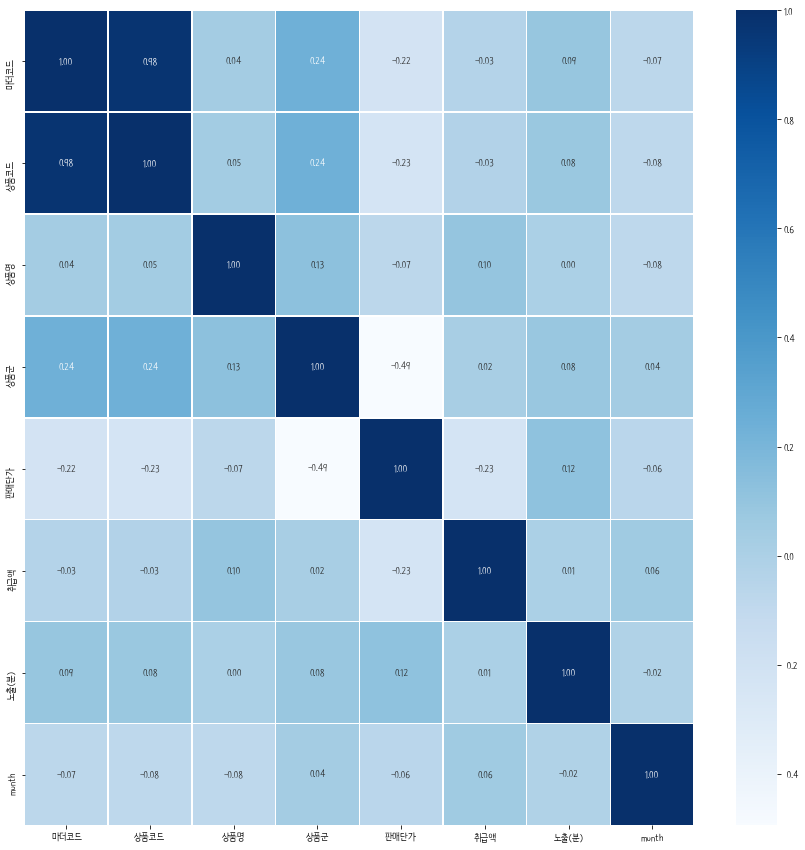

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data = performance.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

마더코드와 상품코드는 상관관계가 높을 수밖에 없음 - 브랜드와 그 품목들에 해당하기 때문에

마더코드와 노출(분)/상품코드와 노출(분)

취급액과 상품명이 그나마 높은 편 + 취급액과 month 근데 유의미하다..? -> 아주 약한 상관관계를 가지고 있다

In [18]:
performance__ = performance_.columns = ['방송일시','마더코드','상품코드','상품명','상품군','판매단가','취급액','노출','요일','month']

In [ ]:
import statsmodels.api as sm
result = sm.OLS.from_formula("취급액 ~ C(month) + C(요일) + C(마더코드) + C(노출)", data=performance__).fit()
print(result.summary())

취급액과 상품명은 약한 상관관계가 있는데 상품코드와는 다른 수치 -> 상품코드에 따른 상품명들을 모두 추출하여 다른 부분을 찾을 것

In [91]:
performance_.tail(5)

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출,요일,month
38305,2020-01-01 00:20:00,100073,200196,959,4,0,0,20,wed,1
38306,2020-01-01 00:40:00,100073,200196,959,4,0,0,20,wed,1
38307,2020-01-01 01:00:00,100073,200196,959,4,0,0,20,wed,1
38308,2020-01-01 01:20:00,100490,201478,487,4,0,0,20,wed,1
38309,2020-01-01 01:40:00,100490,201478,487,4,0,0,17,wed,1


In [102]:
performance_.sort_values(by = '상품명')

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출,요일,month
22687,2019-08-02 00:40:00,100055,200139,0,2,59000,33780000,20,fri,8
22372,2019-07-29 23:40:00,100055,200139,0,2,59000,35922000,20,mon,7
20378,2019-07-11 23:00:00,100055,200139,0,2,59000,34684000,20,thur,7
20379,2019-07-11 23:20:00,100055,200139,0,2,59000,43930000,20,thur,7
20380,2019-07-11 23:40:00,100055,200139,0,2,59000,39092000,20,thur,7
...,...,...,...,...,...,...,...,...,...,...
34044,2019-11-19 14:20:00,100288,200923,1769,6,69900,15747000,20,tue,11
34046,2019-11-19 14:40:00,100288,200923,1769,6,69900,20475000,20,tue,11
35903,2019-12-08 07:20:00,100288,200923,1769,6,69900,12141000,20,sun,12
35526,2019-12-04 15:00:00,100288,200923,1769,6,69900,15080000,20,wed,12


In [194]:
name_encode

,name,encode
0,뉴트리원 다이어트 구미,0
1,[가이거] 블랙 에디션 다이아몬드 워치(남성용),1
2,[가이거] 블랙 에디션 다이아몬드 워치(여성용),2
3,[맛있는 제주]손질 생선 3대세트+흑돼지구이(광어+갈치+고등어,3
4,국내제조 오슬로 IH 프라이팬 세트,4
...,...,...
1765,효재 화원 자수 광목워싱 침구세트 퀸,1765
1766,효재 화원 자수 광목워싱 침구세트 킹,1766
1767,휴테크 안마의자,1767
1768,히트융 극세사 퍼융기모 남성 동내의 패키지,1768


In [198]:
code = performance_['상품코드'].unique() #유일한 상품코드들이 등장, 2124개
code_name = performance_['상품명'].unique() #1770개
#->같은 상품명인데도 다른 상품코드들?

code_name_df = pd.DataFrame()
code_name_df['code'] = performance_['상품코드']
code_name_df['encode_name'] = performance_['상품명']
sort_cn_df = code_name_df.groupby(by = 'encode_name').mean()

sort_cn_df = sort_cn_df.astype({'code' : 'float'})

sort_cn_df

,code
encode_name,
0,200139.000000
1,200942.000000
2,200943.000000
3,200602.000000
4,200231.000000
...,...
1765,200680.500000
1766,200682.500000
1767,202349.000000


In [138]:
sort_cn_df_ = sort_cn_df.to_numpy()

In [147]:
sort_cn_df_ = np.ceil(sort_cn_df_)

In [149]:
sort_cn_df_

array([[200139.],
       [200942.],
       [200943.],
       ...,
       [202349.],
       [200921.],
       [200923.]])

In [204]:
sort_cn_df = pd.merge(sort_cn_df, name_encode, on='encode_name')

In [205]:
float_list = []

for i in range(len(sort_cn_df)) : 
    if sort_cn_df_[i] != sort_cn_df['code'][i] : 
        float_list.append(sort_cn_df['code'][i])
        
float_list

#float형태로 출력된 애들 모조리 출력
#sort_cn_df['code']에서 float_list 안에 있는 애들만 따로 또 출력

[202150.5,
 202152.5,
 200686.13513513515,
 200690.13513513515,
 200694.13513513515,
 201171.95238095237,
 200703.4054054054,
 200707.4054054054,
 200711.4054054054,
 201179.95238095237,
 201181.95238095237,
 201183.95238095237,
 201186.95238095237,
 202023.92857142858,
 201962.77777777778,
 201371.25,
 201373.25,
 200339.57142857142,
 202380.66666666666,
 202382.66666666666,
 202389.5,
 202393.5,
 200839.7142857143,
 200843.8,
 200845.2380952381,
 200849.11764705883,
 200852.7142857143,
 200856.2380952381,
 200860.11764705883,
 201394.48,
 201402.17142857143,
 201407.65217391305,
 201200.58333333334,
 201202.58333333334,
 201204.58333333334,
 201206.58333333334,
 200618.33333333334,
 200829.5172413793,
 200831.5172413793,
 201261.625,
 201264.625,
 201031.41463414635,
 201619.63157894736,
 202158.14285714287,
 202160.14285714287,
 200610.5,
 200254.33333333334,
 200257.5,
 201049.33333333334,
 200125.54098360657,
 200061.46153846153,
 201340.7358490566,
 201480.6923076923,
 201222.769

In [206]:
mismatch = sort_cn_df[sort_cn_df['code'].isin(float_list)]
mismatch
#false인 애들만 뽑아나오게 하기!!

,encode_name,code,name
5,5,202150.500000,메디아글램 카이만엠보 소가죽 체인숄더백 (+클러치백+폼폼이)
6,6,202152.500000,메디아글램 카이만엠보 소가죽 토트백 (+클러치백+폼폼이)
33,33,200686.135135,(무)[보루네오] 피올레 천연소가죽 소파 3인용
34,34,200690.135135,(무)[보루네오] 피올레 천연소가죽 소파 4인용
35,35,200694.135135,(무)[보루네오] 피올레 천연소가죽 소파 6인용
...,...,...,...
1764,1764,200678.500000,효재 화원 자수 광목워싱 침구세트 슈퍼싱글
1765,1765,200680.500000,효재 화원 자수 광목워싱 침구세트 퀸
1766,1766,200682.500000,효재 화원 자수 광목워싱 침구세트 킹
1768,1768,200920.933333,히트융 극세사 퍼융기모 남성 동내의 패키지


In [220]:
mismatch = mismatch.reset_index()

In [221]:
del mismatch['index']

In [222]:
mismatch

,encode_name,code,name
0,5,202150.500000,메디아글램 카이만엠보 소가죽 체인숄더백 (+클러치백+폼폼이)
1,6,202152.500000,메디아글램 카이만엠보 소가죽 토트백 (+클러치백+폼폼이)
2,33,200686.135135,(무)[보루네오] 피올레 천연소가죽 소파 3인용
3,34,200690.135135,(무)[보루네오] 피올레 천연소가죽 소파 4인용
4,35,200694.135135,(무)[보루네오] 피올레 천연소가죽 소파 6인용
...,...,...,...
264,1764,200678.500000,효재 화원 자수 광목워싱 침구세트 슈퍼싱글
265,1765,200680.500000,효재 화원 자수 광목워싱 침구세트 퀸
266,1766,200682.500000,효재 화원 자수 광목워싱 침구세트 킹
267,1768,200920.933333,히트융 극세사 퍼융기모 남성 동내의 패키지


In [233]:
final_name = using_performance[using_performance['상품명'].isin(mismatch['name'])]
final_name

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출(분)
13,2019-01-01 09:00:00,100816,202404,보코 리버시블 무스탕,의류,79000,16075000,20
14,2019-01-01 09:20:00,100816,202404,보코 리버시블 무스탕,의류,79000,25628000,20
15,2019-01-01 09:40:00,100816,202404,보코 리버시블 무스탕,의류,79000,49270000,20
21,2019-01-01 12:00:00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,33823000,20
22,2019-01-01 12:20:00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,59083000,20
...,...,...,...,...,...,...,...,...
38288,2019-12-31 22:00:00,100155,200556,일시불 LG전자 매직스페이스 냉장고,가전,1359000,72733000,20
38289,2019-12-31 22:00:00,100155,200489,무이자 LG전자 매직스페이스 냉장고,가전,1499000,32184000,20
38290,2019-12-31 22:20:00,100543,201624,넥센타이어 렌탈서비스,무형,0,0,20
38291,2019-12-31 22:40:00,100543,201624,넥센타이어 렌탈서비스,무형,0,0,20


In [234]:
final_name.loc[(final_name['상품명'].str.contains('보코 리버시블 무스탕')), :]

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출(분)
13,2019-01-01 09:00:00,100816,202404,보코 리버시블 무스탕,의류,79000,16075000,20
14,2019-01-01 09:20:00,100816,202404,보코 리버시블 무스탕,의류,79000,25628000,20
15,2019-01-01 09:40:00,100816,202404,보코 리버시블 무스탕,의류,79000,49270000,20
189,2019-01-03 11:00:00,100816,202404,보코 리버시블 무스탕,의류,79000,16785000,20
190,2019-01-03 11:20:00,100816,202404,보코 리버시블 무스탕,의류,79000,32391000,20
191,2019-01-03 11:40:00,100816,202404,보코 리버시블 무스탕,의류,79000,35613000,20
366,2019-01-05 10:00:00,100816,202404,보코 리버시블 무스탕,의류,79000,18277000,20
367,2019-01-05 10:20:00,100816,202404,보코 리버시블 무스탕,의류,79000,27738000,20
368,2019-01-05 10:40:00,100816,202404,보코 리버시블 무스탕,의류,79000,35456000,20
457,2019-01-06 09:00:00,100816,202404,보코 리버시블 무스탕,의류,79000,13717000,20


In [235]:
final_name.loc[(final_name['상품명'].str.contains('에코라믹 통주물 스톤 냄비세트')), :]

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출(분)
21,2019-01-01 12:00:00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,33823000,20
22,2019-01-01 12:20:00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,59083000,20
23,2019-01-01 12:40:00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,99235000,20
375,2019-01-05 13:00:00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,37162000,20
376,2019-01-05 13:20:00,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,66955000,20
...,...,...,...,...,...,...,...,...
21910,2019-07-25 12:20:00,100088,200237,에코라믹 통주물 스톤 냄비세트,주방,60900,28564000,20
21911,2019-07-25 12:40:00,100088,200237,에코라믹 통주물 스톤 냄비세트,주방,60900,36926000,20
23488,2019-08-09 15:00:00,100088,200237,에코라믹 통주물 스톤 냄비세트,주방,60900,14253000,20
23489,2019-08-09 15:20:00,100088,200237,에코라믹 통주물 스톤 냄비세트,주방,60900,34721000,20


무슨 기준으로 상품명은 동일하지만 상품코드가 다를까? 판매단가도 아닌 듯...

요일을 처리하기 쉽도록 수치형데이터로 바꿔주기
- 주말/주중 중 어디가 더 영향이 클지 알아보기 위해 ; 이미 은서가 했던 거

In [85]:
items = performance['요일']
encoder = LabelEncoder()
encoder.fit(items)

labels = performance['요일 num'] = encoder.transform(items)

In [86]:
print(encoder.classes_)
"""
0 : 금
1 : 목
2 : 수
3 : 월
4 : 일
5 : 토
6 : 화
"""

['fri' 'mon' 'sat' 'sun' 'thur' 'tue' 'wed']


'\n0 : 금\n1 : 목\n2 : 수\n3 : 월\n4 : 일\n5 : 토\n6 : 화\n'

In [64]:
performance

,방송일시,마더코드,상품코드,상품명,상품군,판매단가,취급액,노출(분),요일,요일 num
1,2019-01-01 06:00:00,100346,201072,1592,7,39900,2099000,20,화,6
2,2019-01-01 06:00:00,100346,201079,1598,7,39900,4371000,20,화,6
3,2019-01-01 06:20:00,100346,201072,1592,7,39900,3262000,20,화,6
4,2019-01-01 06:20:00,100346,201079,1598,7,39900,6955000,20,화,6
5,2019-01-01 06:40:00,100346,201072,1592,7,39900,6672000,20,화,6
...,...,...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,100073,200196,959,4,0,0,20,수,2
38306,2020-01-01 00:40:00,100073,200196,959,4,0,0,20,수,2
38307,2020-01-01 01:00:00,100073,200196,959,4,0,0,20,수,2
38308,2020-01-01 01:20:00,100490,201478,487,4,0,0,20,수,2


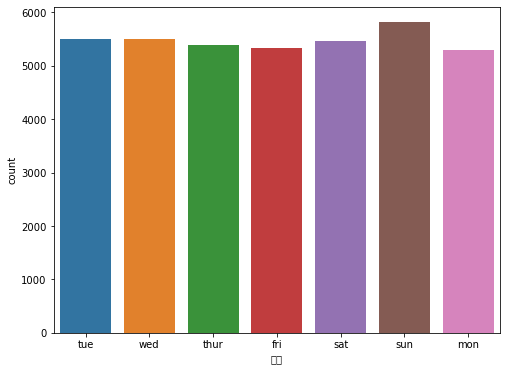

In [87]:
f, ax = plt.subplots(figsize = (8,6))
sns.countplot(performance['요일'])
plt.show()

In [25]:
'''
1. 각 요소별로 취급액에 어떤 영향을 주는지 + 시각화
2. 시청률 데이터 : 언더샘플링?
'''

'\n1. 각 요소별로 취급액에 어떤 영향을 주는지 + 시각화\n'